In [1]:
%pip install openai

Note: you may need to restart the kernel to use updated packages.


In [2]:
from classes.data_loader import DataLoader
from classes.technical_indicators import TechnicalIndicators
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Analysis configuration
SYMBOL = "MSFT" # ['AAPL', 'GOOGL', 'MSFT', 'NVDA', 'BRK-B']
TIME_PERIOD = "5y"

## Load data and initialize indicator instances

In [4]:
stock_loader = DataLoader(SYMBOL, period=TIME_PERIOD)
stock_data_df = stock_loader.data
stock_indicators = TechnicalIndicators(data=stock_data_df)

print(stock_data_df)

                  open        high         low       close    volume  \
date                                                                   
2020-05-29  175.070975  176.546435  172.848224  175.569183  42130400   
2020-06-01  174.888926  175.329651  173.854206  175.166779  22622400   
2020-06-02  176.527267  177.245831  173.748825  177.159607  30794600   
2020-06-03  177.073384  178.146435  175.885353  177.590744  27311000   
2020-06-04  176.575169  178.050614  174.658998  175.253006  28761800   
...                ...         ...         ...         ...       ...   
2025-05-21  454.570007  457.779999  451.809998  452.570007  19216900   
2025-05-22  454.950012  460.250000  453.899994  454.859985  18025600   
2025-05-23  449.980011  453.690002  448.910004  450.179993  16883500   
2025-05-27  456.480011  460.950012  456.119995  460.690002  20974300   
2025-05-28  461.220001  462.519989  456.929993  457.359985  16992000   

                  pe  profit_margin     roe  current_ratio   be

### Inspect the DataFrame for missing (NaN) values

In [5]:
print(f"Number of NaN values: {stock_data_df.isna().sum().sum()}")

Number of NaN values: 0


## MA50 & MA200

In [6]:
stock_data_df['ma50'] = stock_indicators.sma(period=50)
stock_data_df['ma200'] = stock_indicators.sma(period=200)

print(stock_data_df.tail(5))

                  open        high         low       close    volume  \
date                                                                   
2025-05-21  454.570007  457.779999  451.809998  452.570007  19216900   
2025-05-22  454.950012  460.250000  453.899994  454.859985  18025600   
2025-05-23  449.980011  453.690002  448.910004  450.179993  16883500   
2025-05-27  456.480011  460.950012  456.119995  460.690002  20974300   
2025-05-28  461.220001  462.519989  456.929993  457.359985  16992000   

                  pe  profit_margin     roe  current_ratio   beta        ma50  \
date                                                                            
2025-05-21  35.34467        0.35789  0.3361          1.372  0.985  399.816405   
2025-05-22  35.34467        0.35789  0.3361          1.372  0.985  401.262252   
2025-05-23  35.34467        0.35789  0.3361          1.372  0.985  402.704333   
2025-05-27  35.34467        0.35789  0.3361          1.372  0.985  404.161174   
2025-05-2

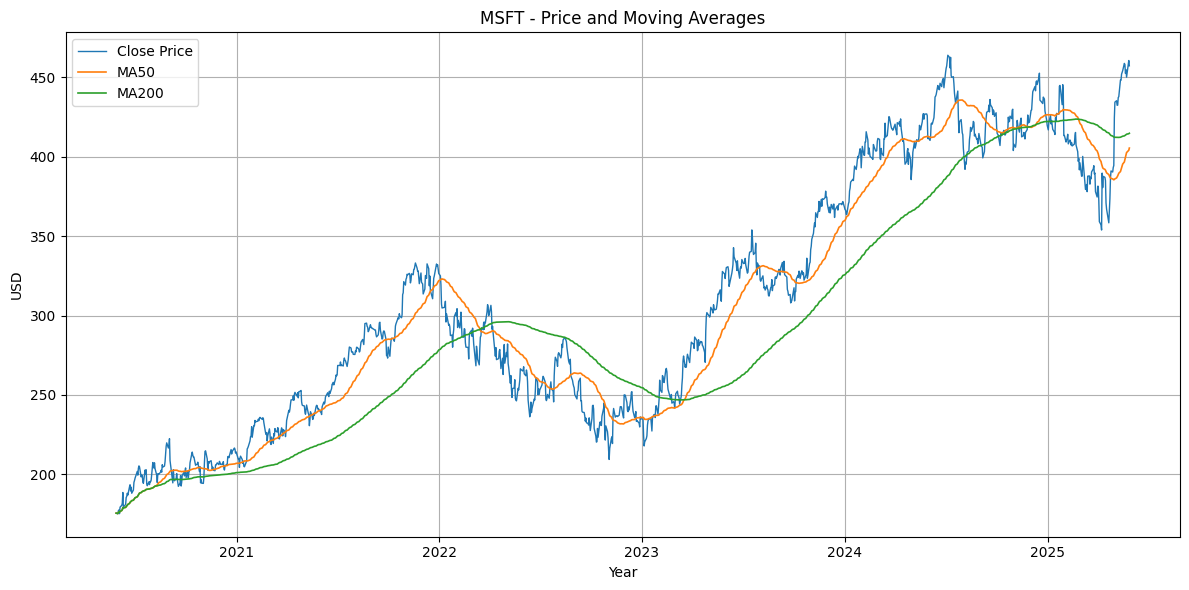

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(stock_data_df.index, stock_data_df["close"], label="Close Price", linewidth=1)
plt.plot(stock_data_df.index, stock_data_df['ma50'], label="MA50", linewidth=1.2)
plt.plot(stock_data_df.index, stock_data_df['ma200'], label="MA200", linewidth=1.2)
plt.title(f"{stock_loader.symbol} - Price and Moving Averages")
plt.xlabel("Year")
plt.ylabel("USD")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## RSI - 14 days

In [8]:
stock_data_df['rsi_14'] = stock_indicators.rsi()

print(stock_data_df['rsi_14'].tail(5))

date
2025-05-21    71.233364
2025-05-22    72.243820
2025-05-23    67.059548
2025-05-27    71.930983
2025-05-28    68.475638
Name: rsi_14, dtype: float64


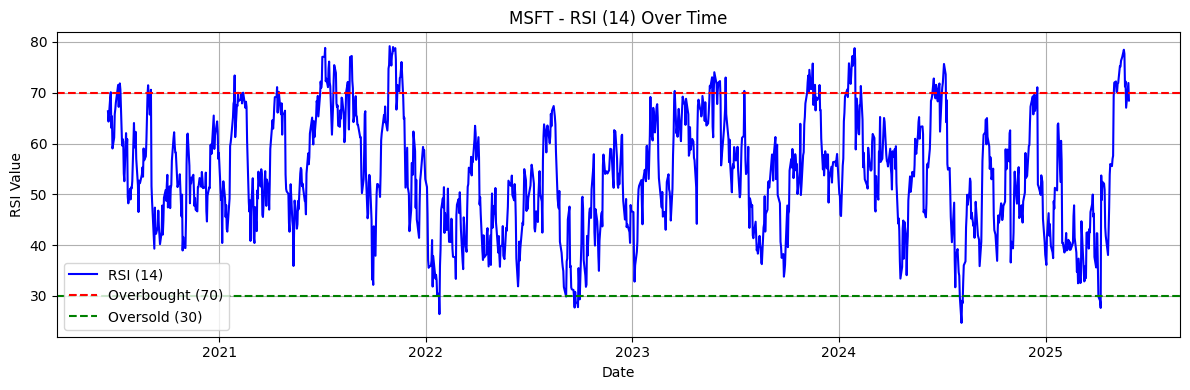

In [9]:
plt.figure(figsize=(12, 4))
plt.plot(stock_data_df['rsi_14'], label="RSI (14)", color="blue")
plt.axhline(70, color="red", linestyle="--", label="Overbought (70)")
plt.axhline(30, color="green", linestyle="--", label="Oversold (30)")
plt.title(f"{stock_loader.symbol} - RSI (14) Over Time")
plt.xlabel("Date")
plt.ylabel("RSI Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Get values for the latest data

In [10]:
latest_ma50 = stock_data_df['ma50'].iloc[-1]
latest_ma200 = stock_data_df['ma200'].iloc[-1]
latest_rsi = stock_data_df['rsi_14'].iloc[-1] 
current_price = stock_data_df["close"].iloc[-1]

latest_pe = stock_data_df['pe'].iloc[-1]
latest_profit_margin = stock_data_df['profit_margin'].iloc[-1]
latest_roe = stock_data_df['roe'].iloc[-1]
latest_current_ratio = stock_data_df['current_ratio'].iloc[-1]
latest_beta = stock_data_df['beta'].iloc[-1]

print(f"Current price: ${current_price:.2f}")
print(f"MA50: ${latest_ma50:.2f}")
print(f"MA200: ${latest_ma200:.2f}")
print(f"RSI: {latest_rsi:.1f}")
print("="*50)
print(f"PE: {latest_pe:.2f}")
print(f"Profit Margin: {latest_profit_margin:.2f}%")
print(f"ROE: {latest_roe:.2f}%")
print(f"Current Ratio: {latest_current_ratio:.2f}")
print(f"Beta: {latest_beta:.2f}")

Current price: $457.36
MA50: $405.55
MA200: $414.88
RSI: 68.5
PE: 35.34
Profit Margin: 0.36%
ROE: 0.34%
Current Ratio: 1.37
Beta: 0.98


## S&P 500 Index

In [11]:
from utils import calculate_percentage_change

sp500_loader = DataLoader("^GSPC", period="1mo")
sp500_data = sp500_loader.data
sp500_pct = calculate_percentage_change(sp500_data["close"]) # calculate percentage change

print(sp500_pct.tail(5))

date
2025-05-21    5.103191
2025-05-22    5.056434
2025-05-23    4.351684
2025-05-27    6.486621
2025-05-28    5.893360
Name: close, dtype: float64


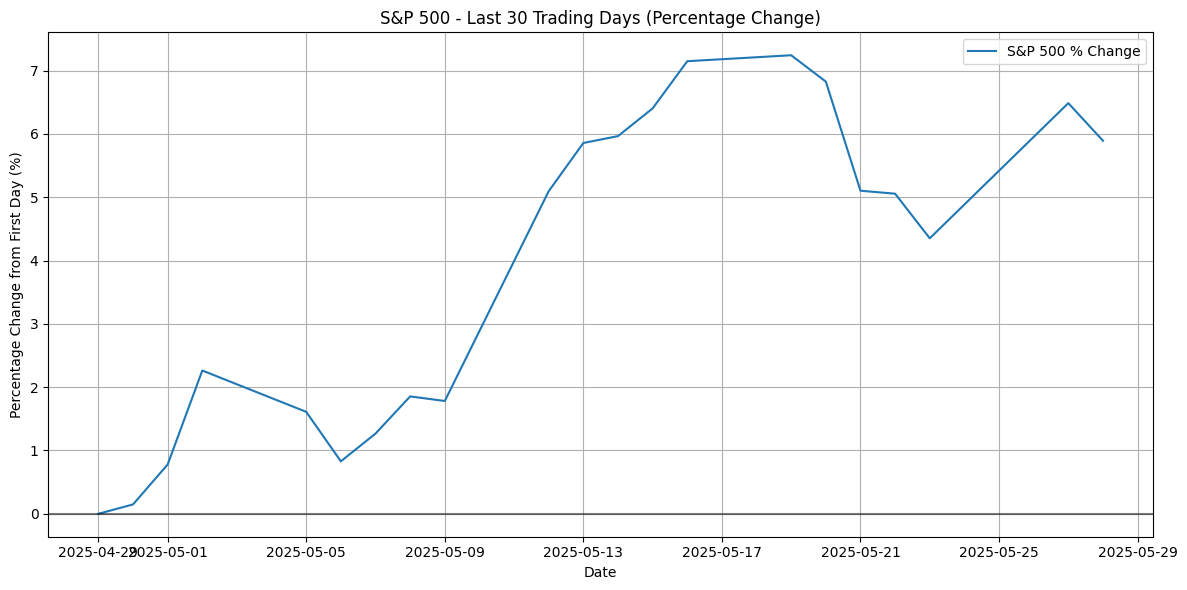

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(sp500_data.index, sp500_pct, label="S&P 500 % Change")
plt.title("S&P 500 - Last 30 Trading Days (Percentage Change)")
plt.xlabel("Date")
plt.ylabel("Percentage Change from First Day (%)")
plt.grid(True)
plt.legend()
plt.axhline(y=0, color='black', linestyle='-', alpha=0.5)
plt.tight_layout()
plt.show()

## 30-Day Stock vs S&P 500

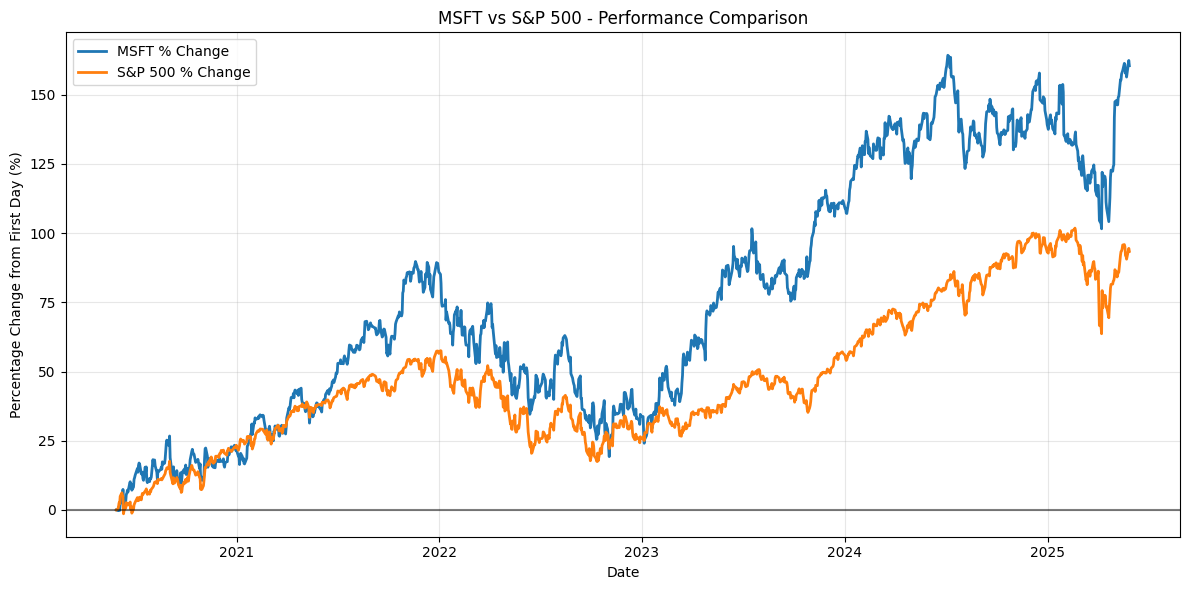

In [13]:
# Load stock data for 30 days (same as SP500)
stock_loader = DataLoader(SYMBOL, period=TIME_PERIOD)
stock_data_df = stock_loader.data

# Load SP500 data (already 30 days)
sp500_loader = DataLoader("^GSPC", period=TIME_PERIOD)
sp500_data = sp500_loader.data

# Calculate both percentage changes
stock_pct = calculate_percentage_change(stock_data_df["close"]).round(2)
sp500_pct = calculate_percentage_change(sp500_data["close"]).round(2)

# Now the plot should show both lines
plt.figure(figsize=(12, 6))
plt.plot(stock_data_df.index, stock_pct, label=f"{stock_loader.symbol} % Change", linewidth=2)
plt.plot(sp500_data.index, sp500_pct, label="S&P 500 % Change", linewidth=2)
plt.title(f"{stock_loader.symbol} vs S&P 500 - Performance Comparison")
plt.xlabel("Date")
plt.ylabel("Percentage Change from First Day (%)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.5)
plt.tight_layout()
plt.show()

## Test OpenAI Chat 

In [14]:
from classes.openai_chat import StockAnalysisAI

try:
    stock_loader_1mo = DataLoader("AAPL", period="1mo")
    stock_data_1mo_df = stock_loader_1mo.data
    stock_indicators_1mo = TechnicalIndicators(data=stock_data_1mo_df)
    stock_data_1mo_df['ma50'] = stock_indicators_1mo.sma(period=50)
    stock_data_1mo_df['ma200'] = stock_indicators_1mo.sma(period=200)
    stock_data_1mo_df['rsi_14'] = stock_indicators_1mo.rsi()

    sp500_loader_1mo = DataLoader("^GSPC", period="1mo")
    sp500_data_1mo_df = sp500_loader_1mo.data

    ai = StockAnalysisAI()
    analysis = ai.analyze_stock(
        stock=stock_data_1mo_df,
        index=sp500_data_1mo_df,
        stock_symbol=stock_loader_1mo.symbol,
        index_symbol=sp500_loader.symbol
    )
    print(analysis)

except Exception as e:
    print(f"Unexpected error: {e}")

Apple Inc. (AAPL) has experienced a recent price decline of 4.98%, underperforming the S&P 500 (^GSPC), which gained 5.89% during the same period. The stock's RSI is currently at 41.17, indicating it is neither oversold nor overbought. The 50-day moving average (MA50) is above the 200-day moving average (MA200), suggesting no death cross has occurred, which is a positive sign; however, the current price is approaching the MA200, warranting caution. Key performance indicators show a P/E ratio of 31.27, a robust profit margin of 24.30%, and an impressive ROE of 138.02%, although the current ratio of 0.82 indicates potential liquidity concerns. The stock's beta of 1.275 suggests higher volatility compared to the market, and recent trading volume has shown significant spikes, indicating increased investor interest and potential trend strength.
